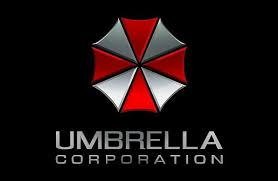

In [ ]:
# importação da biblioteca pandas
import pandas as pd

# lê os dados da tabela
tabela = pd.read_csv('cancelamentos.csv')

# mostra os dados da tabela na tela
display(tabela)

In [ ]:
# Agora vou eliminar dados desnecessários. Vou eliminar o Id do usuario

tabela = tabela.drop('CustomerID', axis=1)
display(tabela)

In [ ]:
# Vamos descobrir quantas linhas com informações vazias nós temos

display(tabela.info())

In [ ]:
# Eliminar as células sem dados
tabela = tabela.dropna()
display(tabela.info())

In [ ]:
# Vamos contar quantos usuários cancelaram, e quantos não cancelaram
display(tabela['cancelou'].value_counts())

# Traduzindo para porcentagem:
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))


In [ ]:
# Próxima análise de dados vai ser para verificar a duração dos contratos
display(tabela['duracao_contrato'].value_counts())
display(tabela['duracao_contrato'].value_counts(normalize=True).map('{:.2%}'.format))

In [ ]:
# Agrupar as informações da duração do contrato
display(tabela.groupby('duracao_contrato').mean(numeric_only=True))

In [ ]:
tabela = tabela[tabela['duracao_contrato'] != 'Monthly']
display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))

In [ ]:
# Vamos agrupar as informações por assinatura e obter a média das linhas para cada uma das colunas.
display(tabela['assinatura'].value_counts(normalize=True).map('{:.2%}'.format))
display(tabela.groupby('assinatura').mean(numeric_only=True))

In [ ]:
# GRÁFICO
import plotly.express as px
for coluna in tabela.columns:
    grafico = px.histogram(tabela, x=coluna, color="cancelou", width=600)
    grafico.show()

In [ ]:
# Achamos as anomalias: ligações para call center e dias de atraso. OS clientes com mais de 20 dias de atraso cancelaram as assinaturas, enquanto 
# que os clientes que fizeram mais de 5 ligações para o call center, todos cancelarama as suas assinaturas.
tabela = tabela[tabela['ligacoes_callcenter'] < 5]
tabela = tabela[tabela['dias_atraso'] <= 20]
display(tabela)
display(tabela['cancelou'].value_counts())
display(tabela['cancelou'].value_counts(normalize=True).map('{:.2%}'.format))